In [29]:
##simple linear regression 

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [31]:
## READ THE DATASET
df=pd.read_csv("height-weight.csv")
df.head()

,Weight,\tHeight
0,40,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'height')

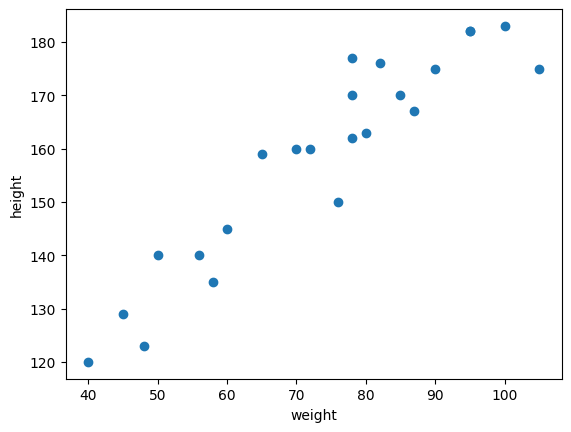

In [32]:
plt.scatter(df['Weight'],df['\tHeight'])
plt.xlabel("weight")
plt.ylabel("height")

In [33]:
## divide our dataset into inependent and dependent eature
x=df[['Weight']]##independent feature
y=df['\tHeight']##dependent feature

In [34]:
##train test split of the dataset

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [37]:
x.shape

(23, 1)

In [38]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [39]:
## standardize the dataset train independent data
from sklearn.preprocessing import StandardScaler


In [40]:
scaler=StandardScaler()

In [41]:
x_train.head()

,Weight
12,105
1,58
13,100
5,78
2,48


In [42]:

x_train =scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


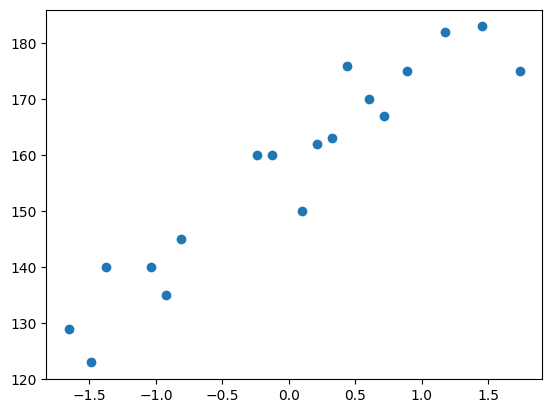

In [43]:
plt.scatter(x_train,y_train)

In [44]:
##train my simple linear regression
from sklearn.linear_model import LinearRegression

In [45]:
regressor=LinearRegression()

In [46]:
regressor.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [47]:
regressor.coef_

array([17.03440872])

In [48]:
regressor.intercept_

np.float64(157.5)

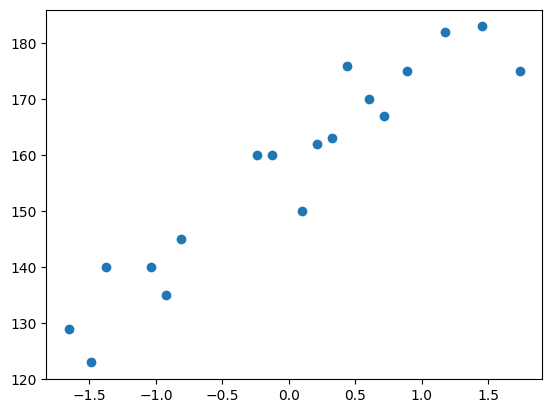

In [49]:
plt.scatter(x_train,y_train)

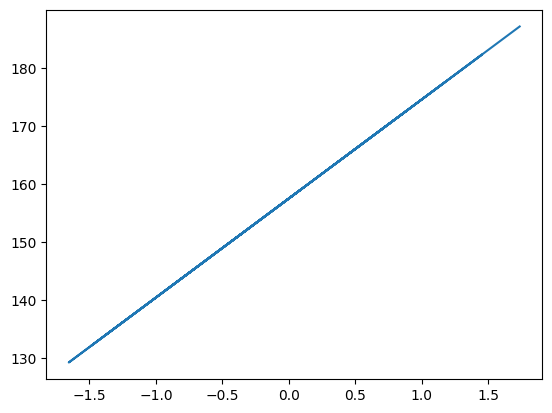

In [50]:
plt.plot(x_train,regressor.predict(x_train))

In [51]:
Y_pred_test=regressor.predict(x_test)

In [52]:
Y_pred_test,y_test

(array([161.08467086, 161.08467086, 124.48892659, 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: \tHeight, dtype: int64)

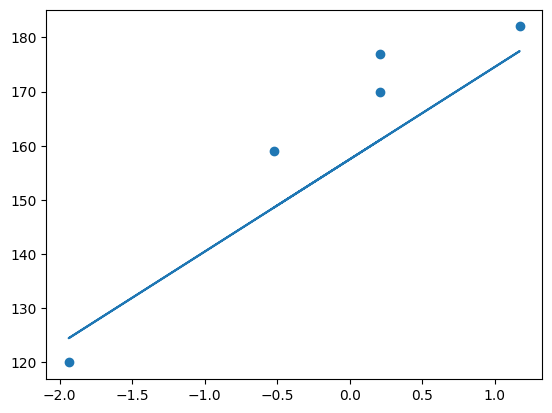

In [53]:
plt.scatter(x_test,y_test)
plt.plot(x_test,regressor.predict(x_test))


In [54]:
##performance matries
##MSE,MAE,RMSE
## R square and ajusted R square

In [55]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [56]:
mse=mean_squared_error(y_test,Y_pred_test)
mae=mean_absolute_error(y_test,Y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

96.4925542278101
8.859611912912229
9.823062365057554


In [57]:
from sklearn.metrics import r2_score
score=r2_score(y_test,Y_pred_test)

In [58]:
score

0.80397254544976

In [60]:
##new data point weight is 80
scaled_weight=scaler.transform([[80]])
scaled_weight

c:\Users\91706\OneDrive\Desktop\anconda python\myeve\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [63]:
print("the height prediction for weight 80 kg",regressor.predict([scaled_weight[0]]))

the height prediction for weight 80 kg [163.01076266]


In [64]:
##residuls
residuals=y_test-Y_pred_test
residuals

15    15.915329
9      8.915329
0     -4.488927
8      4.543549
17    10.434926
Name: \tHeight, dtype: float64